In [1]:
from __future__ import print_function

# Import standard library packages
import argparse
import os
import random

# Import Pytorch packages
import torch
import torch.nn.parallel
import torch.utils.data
import torchvision.datasets
import torchvision.utils
import torch.nn as nn
import torchvision.transforms as transforms
import torch.backends.cudnn as cudnn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
# Set seed
manual_seed = 23
random.seed(manual_seed)
torch.manual_seed(manual_seed)

In [3]:
# Set data path
dataset_path = "Datasets/celeba"

# Number of workers
num_workers = 2

# Batch size
batch_size = 128

# Size of images
image_size = 64

# Number of colour chanels, 3 for coloured images(i.e. red, green, blue)
num_channels = 3

# Latent vector size
z_size = 100

# Feature maps size in generator
num_gf = 64

# Feature maps size in discriminator
num_df = 64

epochs = 5

# Learning rate
lr = 2e-4

# Beta param for optimizers
beta = 0.5

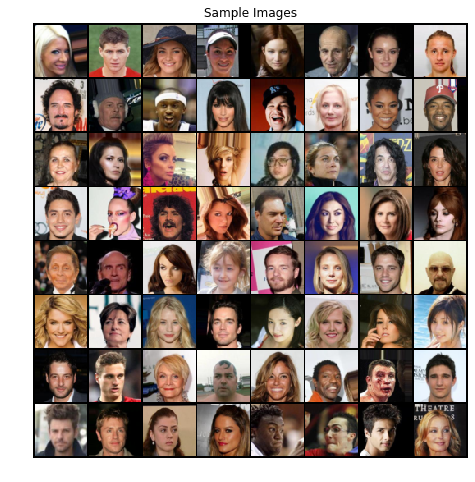

In [5]:
%matplotlib inline

# dataset
dataset = torchvision.datasets.ImageFolder(dataset_path, transform=transforms.Compose([
                                                            transforms.Resize(image_size),
                                                            transforms.CenterCrop(image_size),
                                                            transforms.ToTensor(),
                                                            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                                            ]))

# dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                        shuffle=True, num_workers=num_workers)

# Set device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Plot a sample of images
test_batch = next(iter(dataloader))
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Sample Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(test_batch[0].to(device)[:64], padding=2,
                                                   normalize=True).cpu(), (1, 2, 0)))